In [77]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
# HOST = "192.168.179.2"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [78]:
import pandas as pd

FILE_ID = "20190918202857" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [79]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値右(deg),モーター角度生値左(deg),モーター角度生値(deg),モーター角度(rad),ジャイロ推定角度(rad),...,モーター角速度目標,モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターPWM値目標左,モーターPWM値目標右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーターPWM値左,モーターPWM値右
0,0,0.020957,0.000000,0.020827,-16,0,0,0.0,0.000000,0.013675,...,0.0,0.000000,0.000000,19.338217,19.338217,7390733,0.0,0.0,19.338217,19.338217
1,1,0.035851,0.014894,0.010933,-16,0,0,0.0,0.013675,0.027350,...,0.0,0.641016,0.000219,31.554388,31.554388,7503066,0.0,0.0,31.554388,31.554388
2,2,0.049124,0.013273,0.010150,-9,0,0,0.0,0.027350,0.042979,...,0.0,0.641002,0.000656,37.960790,37.960790,7477266,0.0,0.0,37.960790,37.960790
3,3,0.062709,0.013585,0.010152,-38,2,1,1.5,0.069159,0.050509,...,0.0,1.959803,0.001763,48.484752,48.484752,7443200,0.0,0.0,48.484752,48.484752
4,4,0.075495,0.012786,0.010107,-59,4,2,3.0,0.102869,0.052176,...,0.0,1.580179,0.003409,37.199093,37.199093,7381733,0.0,0.0,37.199093,37.199093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1996,27.460946,0.016306,0.013380,80,-259,-259,-259.0,-4.040343,0.520533,...,0.0,14.303234,21.859710,385.441197,385.441197,7427533,0.0,0.0,100.000000,100.000000
1997,1997,27.476884,0.015938,0.012796,105,-244,-244,-244.0,-3.738071,0.567986,...,0.0,14.169028,21.799901,403.453873,403.453873,7445800,0.0,0.0,100.000000,100.000000
1998,1998,27.493083,0.016199,0.012423,138,-228,-227,-227.5,-3.402638,0.624654,...,0.0,15.723422,21.745458,449.674501,449.674501,7480400,0.0,0.0,100.000000,100.000000
1999,1999,27.510938,0.017855,0.013736,164,-209,-208,-208.5,-3.014357,0.688582,...,0.0,18.200652,21.697229,508.179510,508.179510,7489600,0.0,0.0,100.000000,100.000000


In [80]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

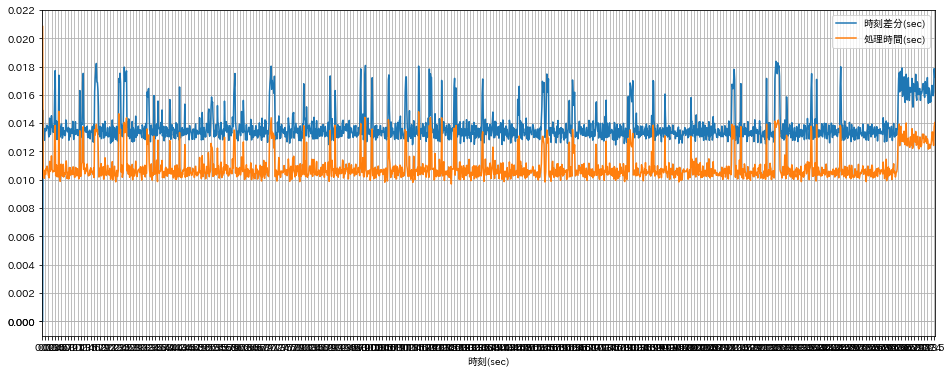

In [81]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

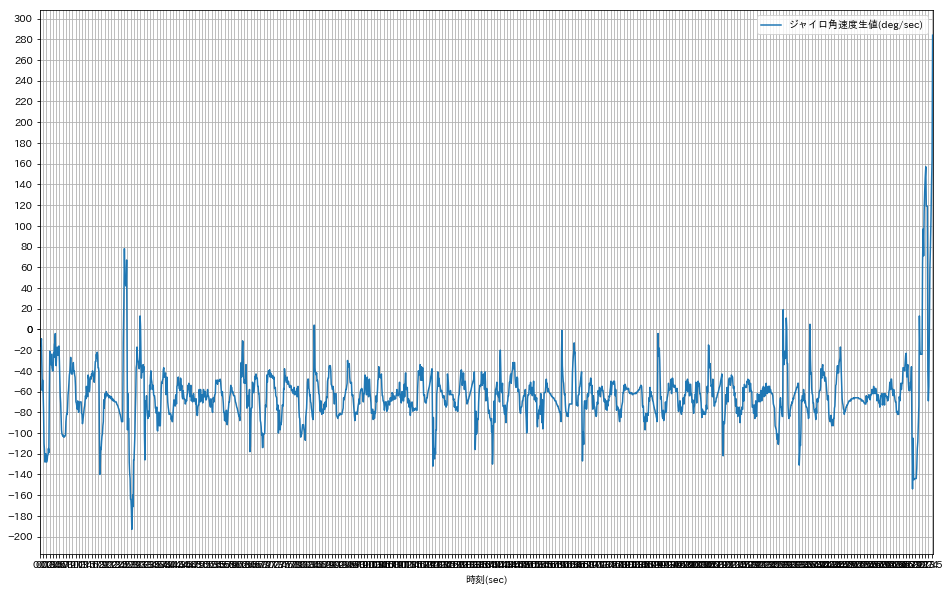

In [82]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

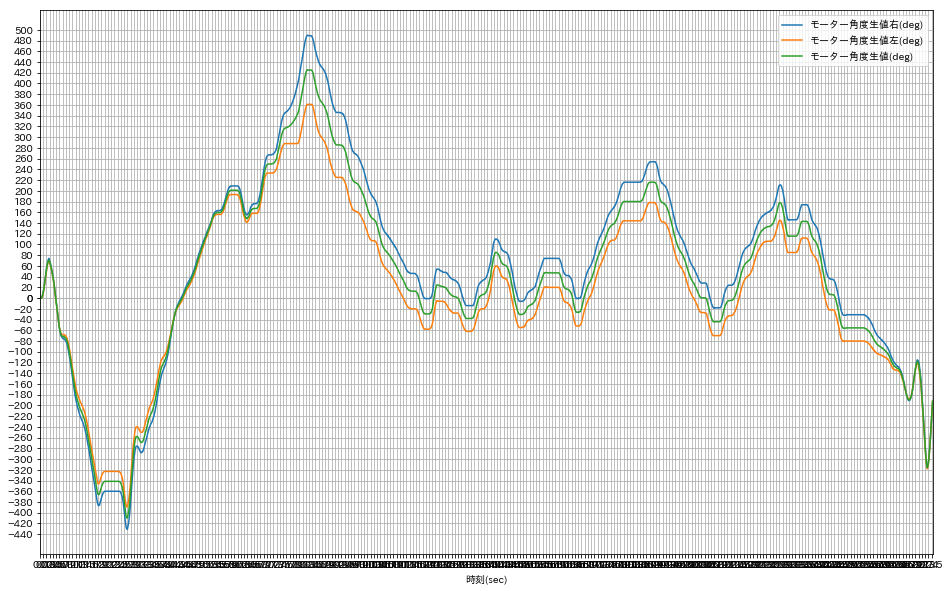

In [83]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'モーター角度生値右(deg)',
    'モーター角度生値左(deg)',
    'モーター角度生値(deg)'
]
show_plot(df, columns_deg, 20, figsize=(16,10))

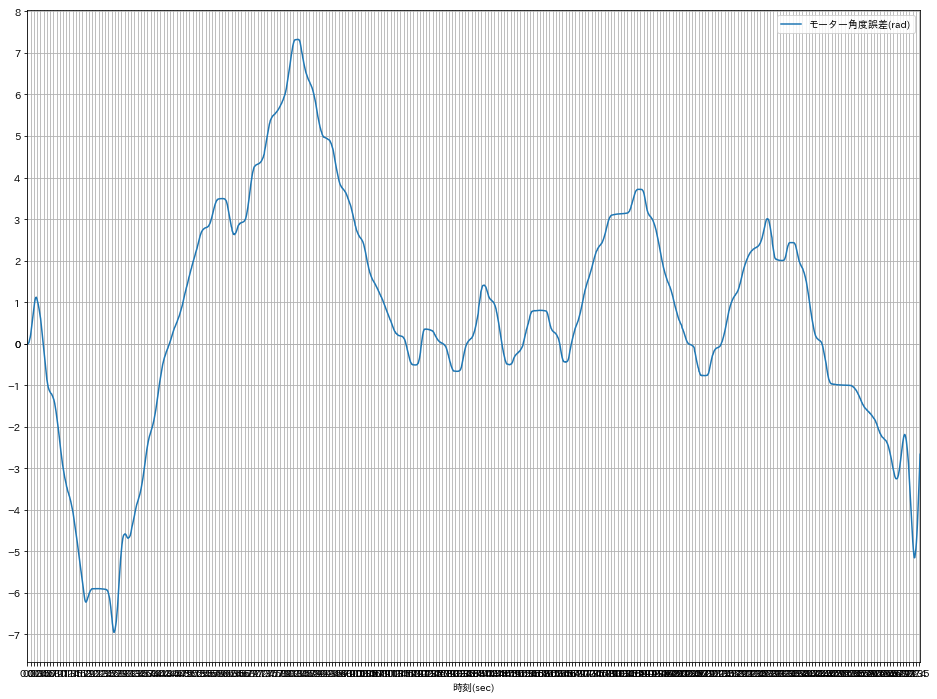

In [84]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

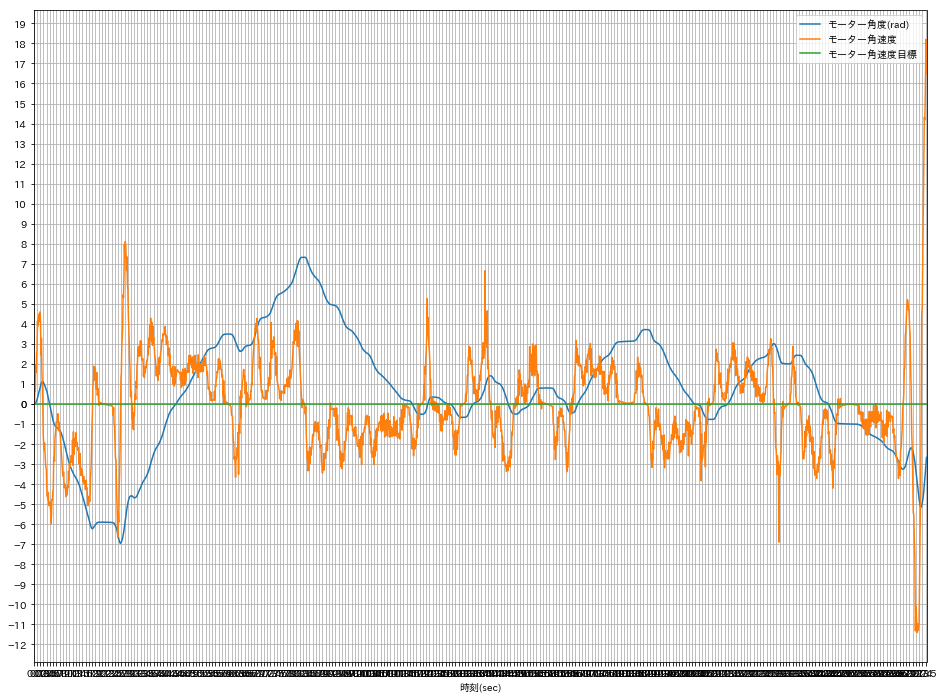

In [85]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度(rad)',
    'モーター角速度',
    'モーター角速度目標'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

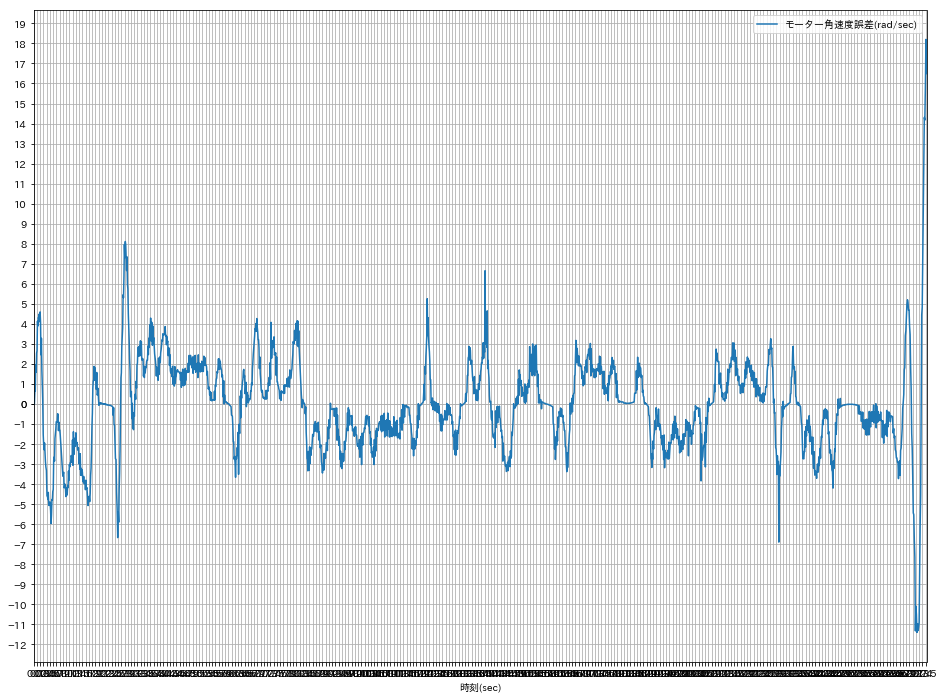

In [86]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角速度誤差(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

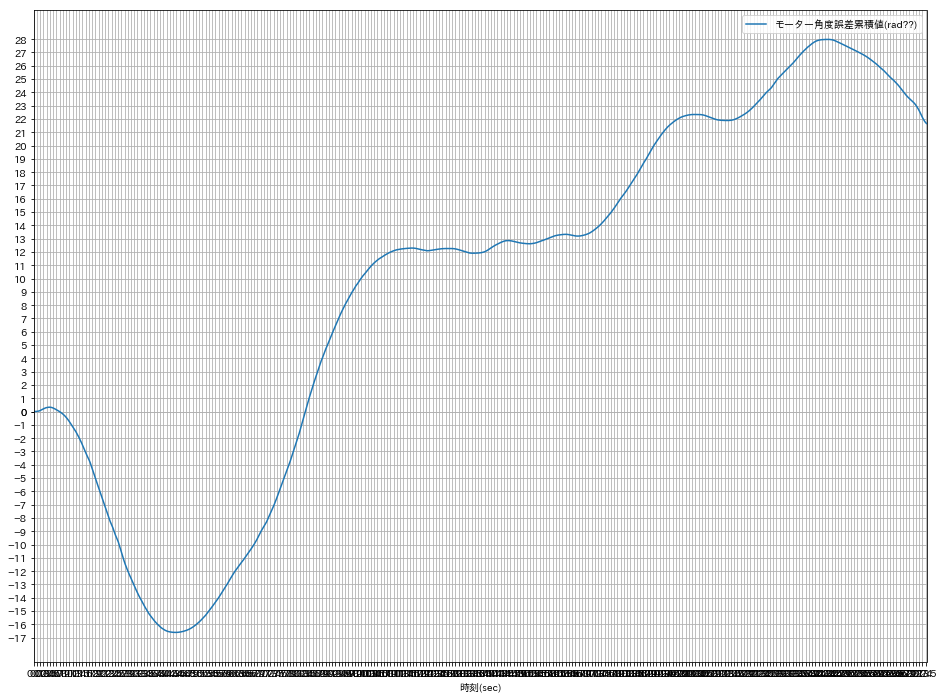

In [87]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

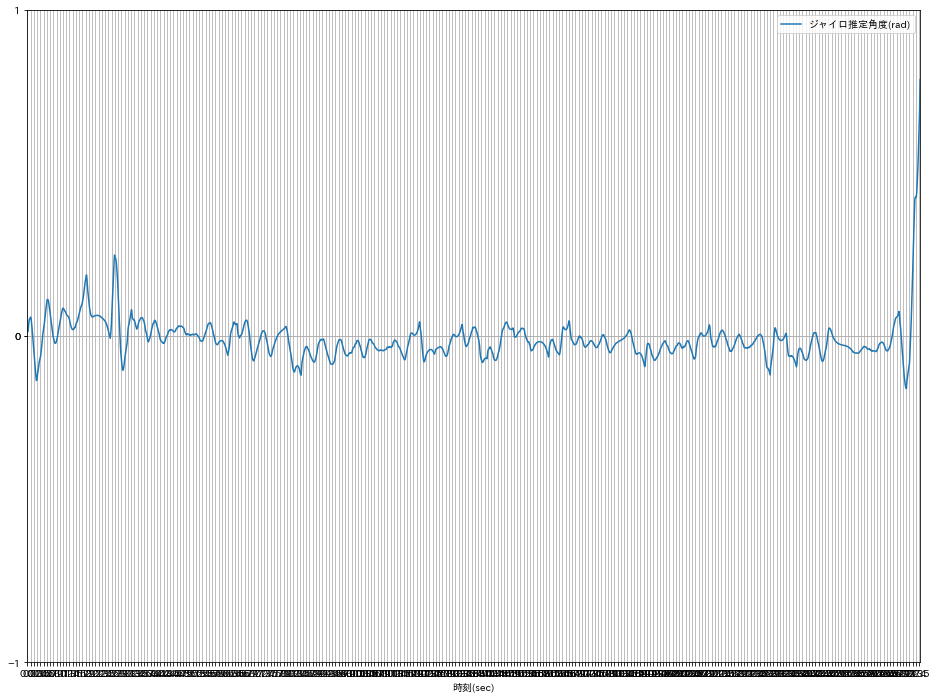

In [88]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

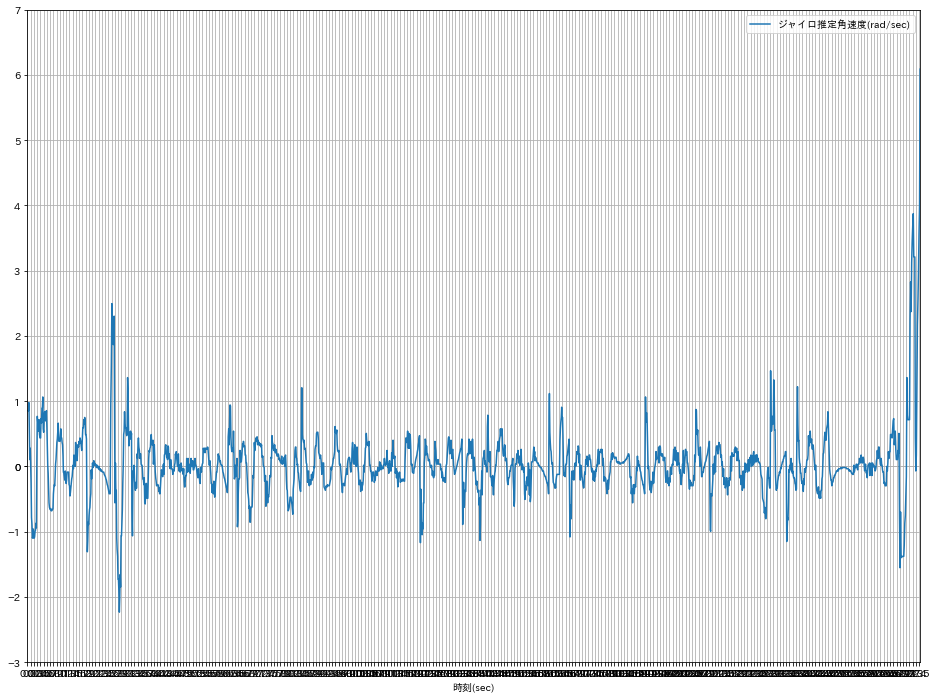

In [89]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角速度(rad/sec)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

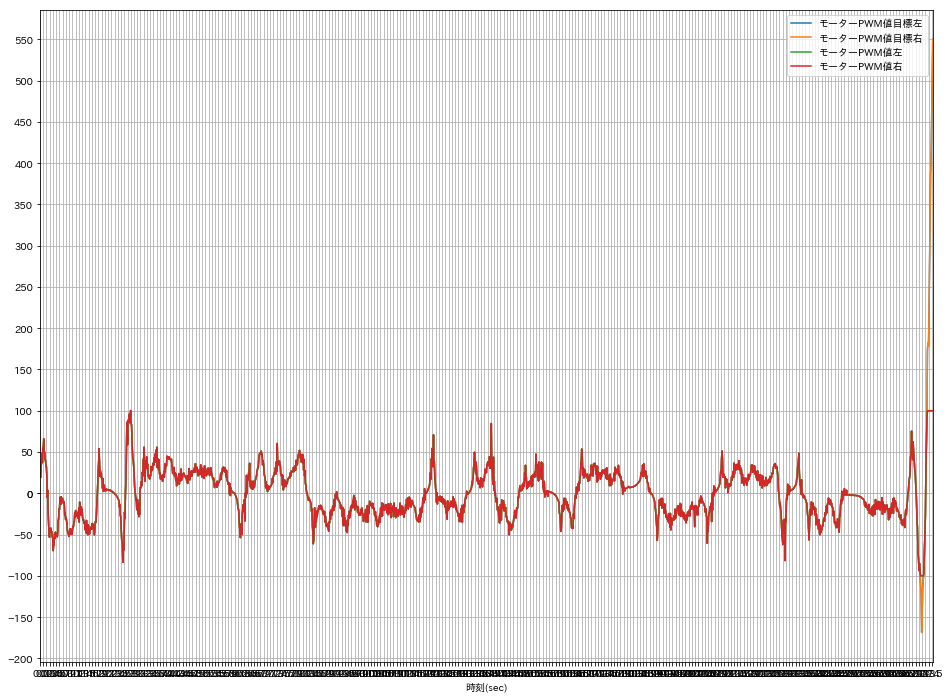

In [90]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターPWM値目標左',
    'モーターPWM値目標右',
    'モーターPWM値左',
    'モーターPWM値右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [91]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/Users/yoshinori/.matplotlib'

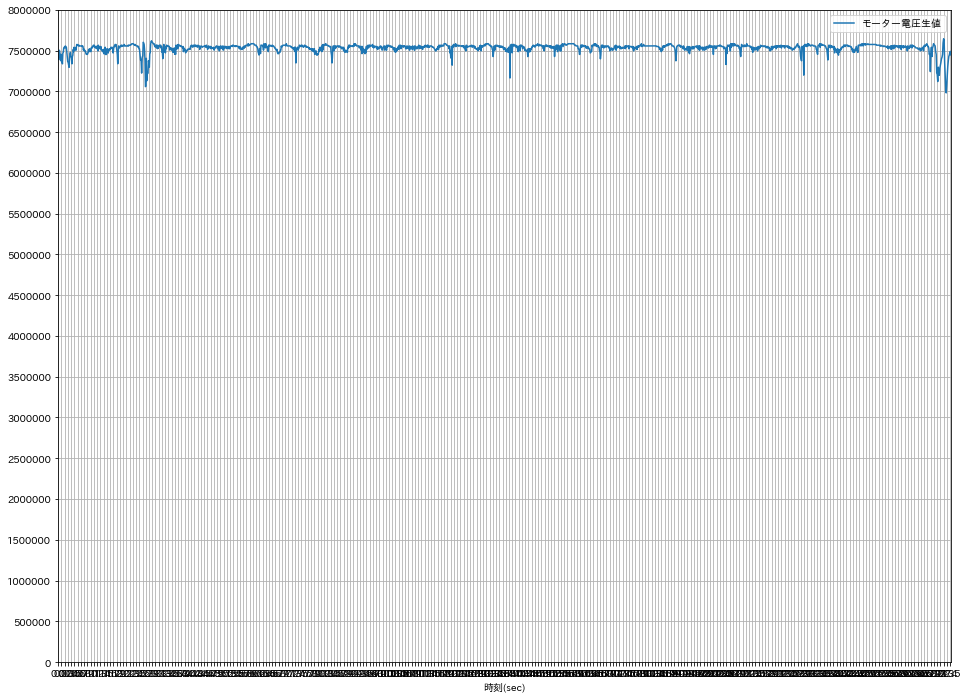

In [92]:
# =======================================================
# モーター電圧生値のグラフ出力

columns_vol = [
    'モーター電圧生値'
]
show_plot(df, columns_vol, 500000, figsize=(16,12)) #, start=0.1, end=0.3)